# Import Uplift calculation (loads needed data)

In [1]:
from Uplift import Uplift

12:50:39 [INFO] Started loading data ...
12:50:39 [INFO] Started loading binary file ...
12:50:39 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_data.feather
12:50:39 [INFO] ... finished loading binary file in 0.34s (1.17s CPU)
12:50:39 [INFO] Started loading binary file ...
12:50:39 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_var_struct.feather
12:50:39 [INFO] ... finished loading binary file in 0.0s (0.0s CPU)
12:50:39 [INFO] Started loading pickle file ...
12:50:39 [INFO] Reading from file C:\Users\kpf\data\axinova\population_ratios.pkl
12:50:39 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
12:50:39 [INFO] Started loading pickle file ...
12:50:39 [INFO] Reading from file C:\Users\kpf\data\axinova\global_code_ratios.pkl
12:50:39 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
12:50:39 [INFO] Started loading pickle file ...
12:50:39 [INFO] Reading from file C:\Users\kpf\data\axinova\station_code_ratios.pkl
12:50:39 [INFO] ... finished loading p

# Initialize and calculate uplift

In [2]:
uplift_test = Uplift(
    name="Senioren ohne Autos",
    variables={"g_220": [0], "md_agenatrep": [3]},
    stations=[],
    time_scale="Hour",
)
print(uplift_test)

Name: 'Senioren ohne Autos'
Stations: ['Aarau', 'Basel SBB', 'Bellinzona', 'Bern', 'Biel/Bienne', 'Brig', 'Chur', 'Fribourg', 'Genève Aéroport', 'Genève Cornavin', 'Lausanne', 'Lugano', 'Luzern', 'M2', 'Neuchatel', 'Olten', 'St. Gallen', 'Winterthur', 'Zug', 'Zürich Enge', 'Zürich Flughafen', 'Zürich Flughafen - Airside', 'Zürich Flughafen - Landside', 'Zürich HB', 'Zürich Hardbrücke', 'Zürich Oerlikon', 'Zürich Stadelhofen']
Timescale: 'Hour'
Selection: 
'Anzahl Autos im Haushalt' = 'Keines'
 AND 'Alter nach 4 Kategorien' = '61+ Jahre'
Results per Variable: 
{}
Total Result: 
Empty DataFrame
Columns: []
Index: []


In [3]:
%%time
uplift_test.calculate()

Wall time: 2.96 s


# Store result table to Excel file

In [4]:
uplift_test.export_result()

12:50:42 [INFO] Started storing xlsx file ...
12:50:42 [INFO] Writing to file C:\Users\kpf\data\axinova\zielgruppen_export\Senioren ohne Autos 20200130_125042.xlsx
12:50:43 [INFO] Written 543.3 KB
12:50:43 [INFO] ... finished storing xlsx file in 0.84s (0.8s CPU)


# Find best slots by uplift vs. population

In [5]:
def best_pop_uplift_slots(report: Uplift, top_n: int = 20, lowest: bool = False):
    return report.result.loc[
        report.result["pop_uplift_pers"].rank(ascending=lowest) <= top_n
    ].reset_index()

## Best slots

In [6]:
best_pop_uplift_slots(uplift_test, 20).sort_values(
    "pop_uplift_pers", ascending=False
)

,Station,DayOfWeek,Hour,spr,target_ratio,target_pers,pop_ratio,global_ratio,station_ratio,pop_uplift,global_uplift,station_uplift,pop_uplift_pers,glob_uplift_pers,stat_uplift_pers
18,Zürich HB,Sunday,14,66120.484538,0.108689,7186.550976,0.034256,0.044059,0.045849,0.074432,0.064630,0.062840,4921.512691,4273.360416,4155.001856
17,Zürich HB,Sunday,13,61105.385086,0.100268,6126.912281,0.034256,0.044059,0.045849,0.066012,0.056209,0.054419,4033.672378,3434.681088,3325.299775
11,Winterthur,Thursday,08,19224.812496,0.222865,4284.546018,0.034256,0.044059,0.064543,0.188609,0.178807,0.158323,3625.976489,3437.523455,3043.723015
8,Bern,Wednesday,18,55045.621996,0.090098,4959.508852,0.034256,0.044059,0.054798,0.055842,0.046039,0.035300,3073.853565,2534.263673,1943.121588
5,Bern,Monday,21,16808.214059,0.203801,3425.529551,0.034256,0.044059,0.054798,0.169545,0.159742,0.149003,2849.743565,2684.979465,2504.473871
9,Bern,Sunday,15,48412.144241,0.090664,4389.231003,0.034256,0.044059,0.054798,0.056408,0.046605,0.035866,2730.813632,2256.249030,1736.344725
16,Zürich HB,Sunday,12,54199.591592,0.084480,4578.778667,0.034256,0.044059,0.045849,0.050224,0.040421,0.038631,2722.105190,2190.808590,2093.788950
19,Zürich HB,Sunday,17,76508.660808,0.067403,5156.918347,0.034256,0.044059,0.045849,0.033147,0.023344,0.021554,2536.020345,1786.036994,1649.083143
2,Bern,Monday,10,25299.137082,0.133074,3366.645018,0.034256,0.044059,0.054798,0.098817,0.089015,0.078276,2499.992052,2251.994879,1980.304160
0,Basel SBB,Tuesday,19,15428.759189,0.189016,2916.278649,0.034256,0.044059,0.079166,0.154760,0.144957,0.109850,2387.747582,2236.505718,1694.841543


## Worst slots

In [7]:
best_pop_uplift_slots(uplift_test, 20, lowest=True).sort_values(
    "pop_uplift_pers", ascending=True
)

,Station,DayOfWeek,Hour,spr,target_ratio,target_pers,pop_ratio,global_ratio,station_ratio,pop_uplift,global_uplift,station_uplift,pop_uplift_pers,glob_uplift_pers,stat_uplift_pers
8,Zürich HB,Monday,17,96088.258877,0.018032,1732.660585,0.034256,0.044059,0.045849,-0.016224,-0.026027,-0.027817,-1558.960560,-2500.874764,-2672.876953
11,Zürich HB,Tuesday,08,58874.306632,0.014956,880.525664,0.034256,0.044059,0.045849,-0.019300,-0.029103,-0.030893,-1136.285910,-1713.406844,-1818.794429
16,Zürich HB,Thursday,07,61857.362881,0.016436,1016.669846,0.034256,0.044059,0.045849,-0.017821,-0.027623,-0.029413,-1102.329979,-1708.692602,-1819.419989
15,Zürich HB,Wednesday,17,96635.663495,0.023342,2255.627187,0.034256,0.044059,0.045849,-0.010915,-0.020717,-0.022507,-1054.745976,-2002.026165,-2175.008231
10,Zürich HB,Tuesday,07,67087.146165,0.020937,1404.571750,0.034256,0.044059,0.045849,-0.013320,-0.023122,-0.024912,-893.580714,-1551.208781,-1671.297708
14,Zürich HB,Wednesday,08,56578.180083,0.019539,1105.495008,0.034256,0.044059,0.045849,-0.014717,-0.024520,-0.026310,-832.659936,-1387.272873,-1488.550291
19,Zürich HB,Friday,19,53190.110758,0.019403,1032.066310,0.034256,0.044059,0.045849,-0.014853,-0.024655,-0.026446,-790.026164,-1311.427232,-1406.639858
13,Zürich HB,Wednesday,07,63415.296513,0.021951,1392.056627,0.034256,0.044059,0.045849,-0.012305,-0.022107,-0.023897,-780.312124,-1401.946539,-1515.462695
12,Zürich HB,Tuesday,17,98870.146432,0.026713,2641.133418,0.034256,0.044059,0.045849,-0.007543,-0.017346,-0.019136,-745.784698,-1714.968616,-1891.950505
6,Winterthur,Tuesday,07,21747.180138,0.003541,77.007843,0.034256,0.044059,0.064543,-0.030715,-0.040518,-0.061002,-667.968483,-881.147263,-1326.615801


# Plot results

## Heatmap of all slots at all stations

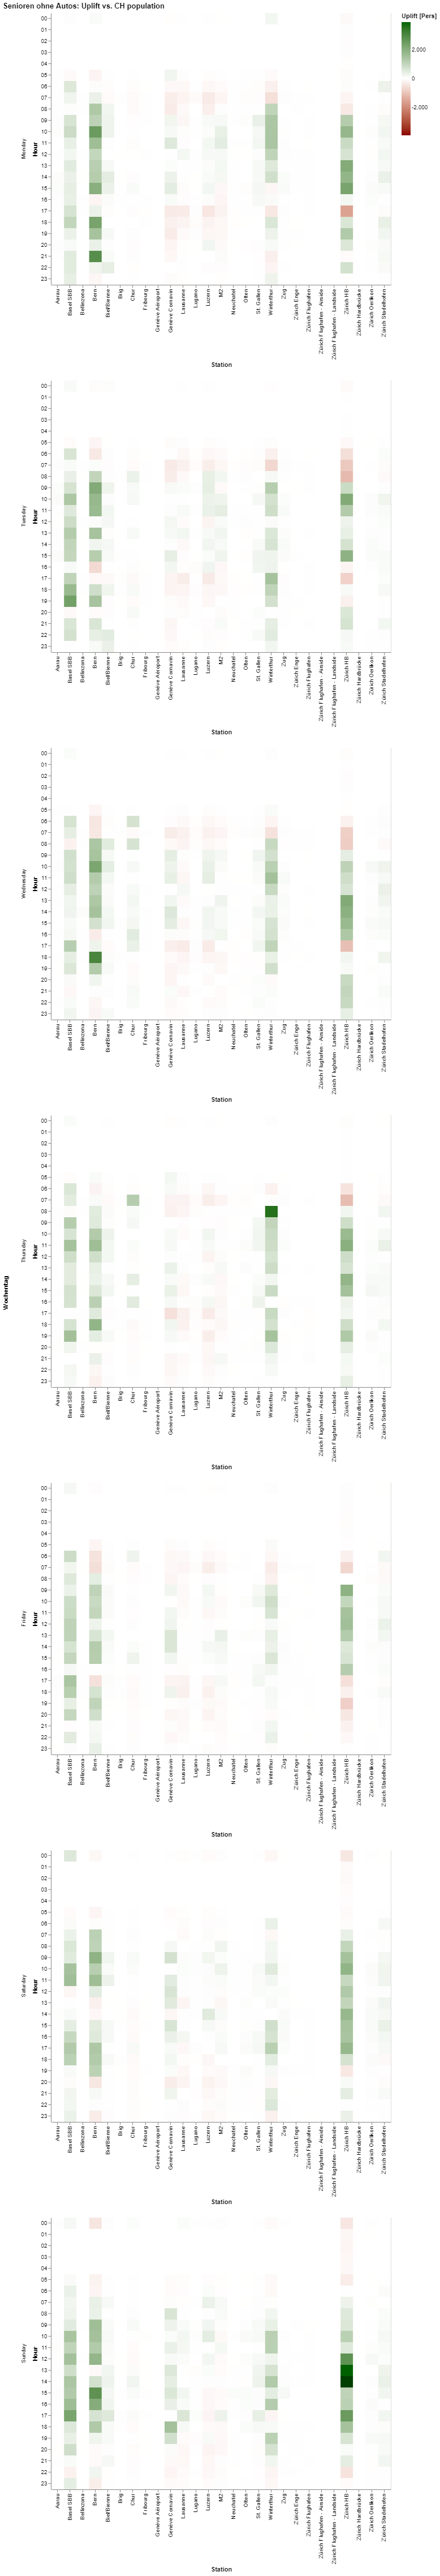

In [8]:
uplift_test.heatmap()

## Uplift vs. population by slot for 4 stations

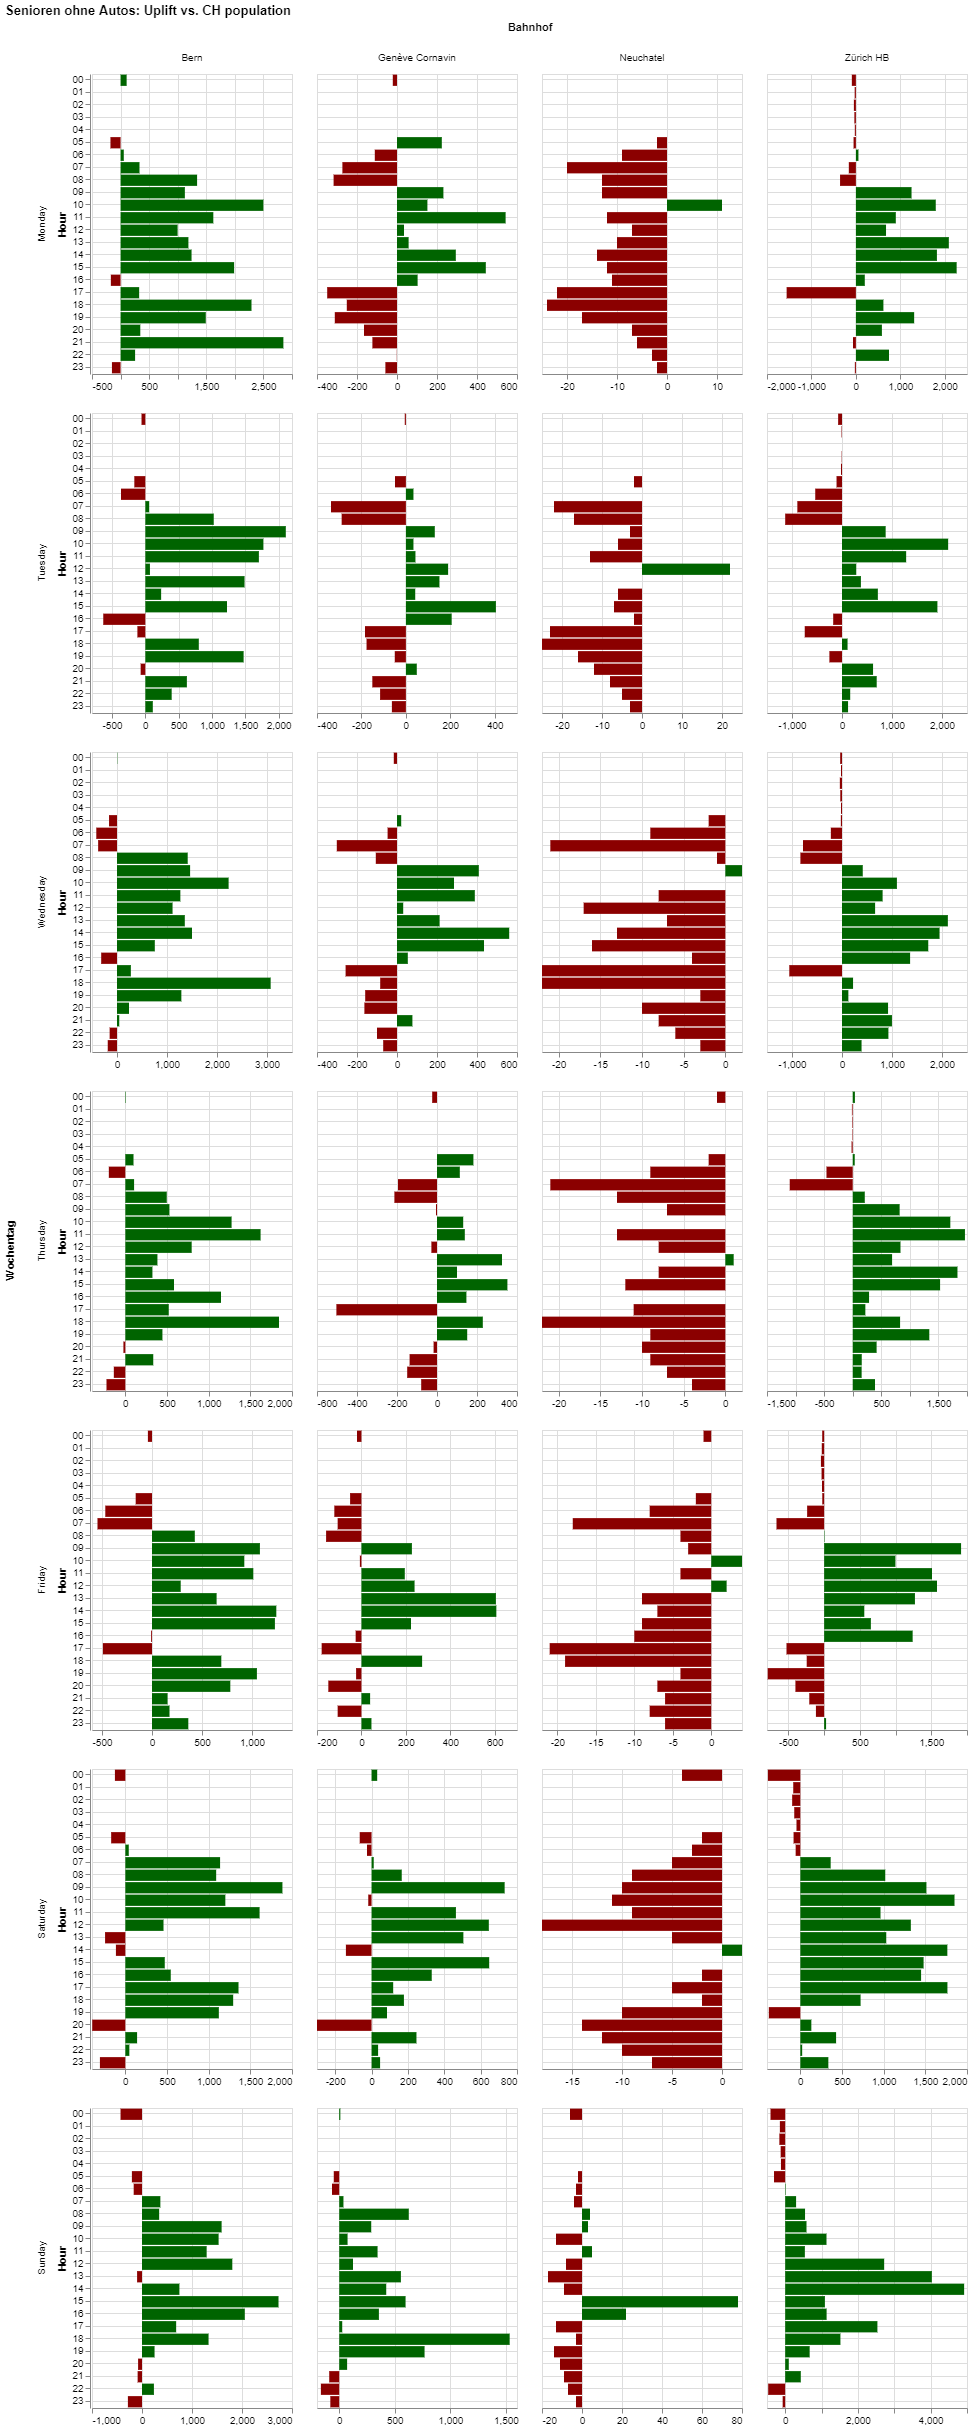

In [9]:
uplift_test.plot_pop_uplift(
    selectors={"Station": ["Zürich HB", "Bern", "Genève Cornavin", "Neuchatel"]},
    plot_properties={"width": 200, "height": 300},
    axes="independent",  # "shared"|"independent"
)